# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2023):
    year_df = pd.read_csv(f"~/main/python/wqi-prediction/data/csv/{i}_lake_data.csv")
    year_df.insert(1,"Year",i)
    dfs.append(year_df)

df = pd.concat(dfs)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,2017,ELANGABEEL SYSTEM POND \n(CONNECTED TO R. KOLA...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,...,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2544.0,2022,SAHEBBANDH AT \nPURULIA,LAKE,WEST \nBENGAL,20,36,9.0,10.2,7.0,...,240,326,2.8,4.3,0.30,1.06,1100,4700,2100,11000
644,2522.0,2022,SINCHAL LAKE FOR \nDARJEELING,LAKE,WEST \nBENGAL,2,18,7.2,8.8,6.9,...,13,50,1.0,1.8,0.30,1.13,2,230,40,1600
645,5163.0,2022,"SUBHAS SAROBAR, \nBELAGHATA, KOLKATA",LAKE,WEST \nBENGAL,22,32,6.7,8.0,7.2,...,349,426,3.0,4.5,0.30,1.36,700,2300,1300,3500
646,2521.0,2022,"WATER RESERVIOR AT \nDELO LAKE, DARJELLING",LAKE,WEST \nBENGAL,8,26,7.0,8.5,7.0,...,16,38,1.0,1.2,0.30,1.17,70,3300,140,11000


In [2]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,2017,"KAWAR LAKE, BEGUSARAI, \nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,...,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,2544.0,2022,SAHEBBANDH AT \nPURULIA,LAKE,WEST \nBENGAL,20,36,9.0,10.2,7.0,...,240,326,2.8,4.3,0.30,1.06,1100,4700,2100,11000
1390,2522.0,2022,SINCHAL LAKE FOR \nDARJEELING,LAKE,WEST \nBENGAL,2,18,7.2,8.8,6.9,...,13,50,1.0,1.8,0.30,1.13,2,230,40,1600
1391,5163.0,2022,"SUBHAS SAROBAR, \nBELAGHATA, KOLKATA",LAKE,WEST \nBENGAL,22,32,6.7,8.0,7.2,...,349,426,3.0,4.5,0.30,1.36,700,2300,1300,3500
1392,2521.0,2022,"WATER RESERVIOR AT \nDELO LAKE, DARJELLING",LAKE,WEST \nBENGAL,8,26,7.0,8.5,7.0,...,16,38,1.0,1.2,0.30,1.17,70,3300,140,11000


In [3]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform"
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
df = df.drop(columns=["Name of Monitoring Location","Type Water Body"])
df = df.astype({"STN Code":int})
df

,STN Code,Year,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790,2017,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0
1,2353,2017,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205,2017,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0
3,2206,2017,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0
4,2557,2017,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,2544,2022,WEST \nBENGAL,20.0,36.0,9.0,10.2,7.0,7.8,240.0,326.0,2.8,4.3,0.30,1.06,1100.0,4700.0,2100.0,11000.0
1390,2522,2022,WEST \nBENGAL,2.0,18.0,7.2,8.8,6.9,7.9,13.0,50.0,1.0,1.8,0.30,1.13,2.0,230.0,40.0,1600.0
1391,5163,2022,WEST \nBENGAL,22.0,32.0,6.7,8.0,7.2,8.3,349.0,426.0,3.0,4.5,0.30,1.36,700.0,2300.0,1300.0,3500.0
1392,2521,2022,WEST \nBENGAL,8.0,26.0,7.0,8.5,7.0,7.7,16.0,38.0,1.0,1.2,0.30,1.17,70.0,3300.0,140.0,11000.0


In [4]:
stv = np.array([5,8.5,2250,3,45,200,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

108.75676031175138

In [5]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal Coliform"],df["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df["Min Total Coliform"],df["Max Total Coliform"])
df_a.rename(columns={
    'Dissolved Oxygen':'DO',
    'Conductivity':'EC',
    'Nitrate N + Nitrite N':'NN',
    'Fecal Coliform':'FC',
    'Total Coliform':'TC'
},inplace=True)
df_a

,DO,pH,EC,BOD,NN,FC,TC
0,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...
1389,9.60,7.40,283.0,3.55,0.680,2900.0,6550.0
1390,8.00,7.40,31.5,1.40,0.715,116.0,820.0
1391,7.35,7.75,387.5,3.75,0.830,1500.0,2400.0
1392,7.75,7.35,27.0,1.10,0.735,1685.0,5570.0


In [6]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a.insert(1,"Year",df["Year"])
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1389,2544,2022,9.60,7.40,283.0,3.55,0.680,2900.0,6550.0,89.667917
1390,2522,2022,8.00,7.40,31.5,1.40,0.715,116.0,820.0,48.335001
1391,5163,2022,7.35,7.75,387.5,3.75,0.830,1500.0,2400.0,98.127149
1392,2521,2022,7.75,7.35,27.0,1.10,0.735,1685.0,5570.0,50.091416


In [7]:
from statsmodels.stats.stattools import medcouple

MC = float(medcouple(df_a["WQI"]))
q1,q3 = np.percentile(df_a["WQI"],[25,75],method='lower')
iqr = q3 - q1
upper_fence = q3 + (1.5*iqr*np.exp(3*MC))
df_a = df_a[df_a["WQI"]<upper_fence]
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1389,2544,2022,9.60,7.40,283.0,3.55,0.680,2900.0,6550.0,89.667917
1390,2522,2022,8.00,7.40,31.5,1.40,0.715,116.0,820.0,48.335001
1391,5163,2022,7.35,7.75,387.5,3.75,0.830,1500.0,2400.0,98.127149
1392,2521,2022,7.75,7.35,27.0,1.10,0.735,1685.0,5570.0,50.091416


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

seed = 42
ncols = ["DO","pH","EC","BOD","NN","FC","TC"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

s = RobustScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,DO,pH,EC,BOD,NN,FC,TC,WQI
0,-1.076923e-01,-0.153846,6.208972,-0.105590,-0.352941,0.155622,0.032469,83.573498
1,-3.384615e-01,-0.692308,0.244747,1.888199,0.140056,4.605416,15.667338,386.865203
2,-1.076923e+00,0.769231,0.562181,0.770186,0.882353,-0.051221,-0.013108,214.186777
3,-4.769231e-01,-0.230769,4.971607,0.031056,-0.443978,0.267581,0.118141,105.412031
4,7.384615e-01,0.615385,-0.386144,-0.242236,-0.112045,0.563711,0.297880,65.733860
...,...,...,...,...,...,...,...,...
1067,-2.769231e-01,-0.230769,-0.042589,0.459627,0.644258,2.329858,13.911073,185.370751
1068,1.230769e-01,0.307692,0.268597,0.099379,-0.201681,0.060458,-0.012679,110.934424
1069,-8.923077e-01,0.307692,0.191936,0.739130,1.120448,-0.053740,-0.029385,204.820249
1070,-2.732857e-16,0.461538,-0.191936,-0.229814,-0.417367,-0.067735,-0.092611,69.012692


In [9]:
selected_features = [0,3,5] # DO,BOD,FC
del_ft = [1,2,4,6]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(1072, 3)


In [10]:
def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

y_c = classify(y_test.to_numpy())
y_c_train = classify(y_train.to_numpy())

print(len(y_c_train))

1072


# Effect of Data Imbalance

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

w = {
    0 : 3.5,
    1 : 1,
    2 : 1.2,
    3 : 1.2,
    4 : 1
}

mlr_uw = LogisticRegression(random_state=seed,solver='newton-cg').fit(X_train_,y_c_train)
yhat_uw = mlr_uw.predict(X_test_)

mlr_w = LogisticRegression(random_state=seed,solver='newton-cg',class_weight=w).fit(X_train_,y_c_train)
yhat_w = mlr_w.predict(X_test_)

print(f'Accuracy \nNo weights : {accuracy_score(y_c,yhat_uw)}, With weighted loss fn : {accuracy_score(y_c,yhat_w)}')
print(f'F1 Score \nNo weights : {f1_score(y_c,yhat_uw,average="macro")}, With weighted loss fn : {f1_score(y_c,yhat_w,average="macro")}')

Accuracy 
No weights : 0.8432835820895522, With weighted loss fn : 0.9104477611940298
F1 Score 
No weights : 0.7162289340640544, With weighted loss fn : 0.8915710635298264


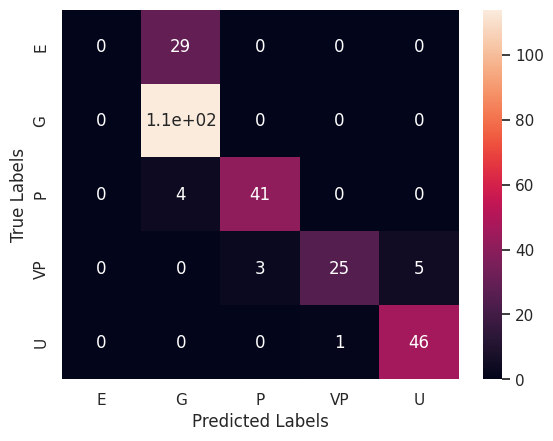

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# seaborn theme defaults
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette("muted")

cm_uw = confusion_matrix(y_c,yhat_uw)
cm_w = confusion_matrix(y_c,yhat_w)

xal = ['E','G','P','VP','U']
sns.heatmap(cm_uw,annot=True,xticklabels=xal,yticklabels=xal)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

When not assigning weights, the predictions concentrate around the majority class leading to poor prediction for the  class E. In order to counteract this, we assign higher weights to classes bordering the majority class. By doing so, wrong predictions for classes E,P,VP are penalized leading to worse performance for the majority class, but increased performance in the minority classes. It partially corrects the bias introduced due to an imbalanced dataset. This is the reason for a significant increase in F1 score.

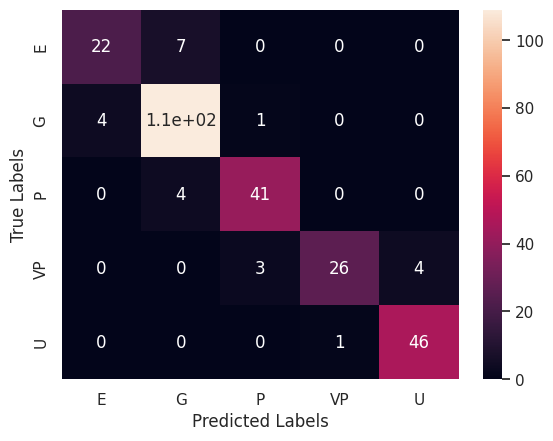

In [14]:
sns.heatmap(cm_w,annot=True,xticklabels=xal,yticklabels=xal)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()